In [2]:
import torch

print("PyTorch version:", torch.__version__)
print("MPS Available:", torch.backends.mps.is_available())

PyTorch version: 2.7.0
MPS Available: True


In [3]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
train_split = int(0.8*len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

for i in [x_train, y_train, x_test, y_test]:
    print(len(i))

40
40
10
10


In [5]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

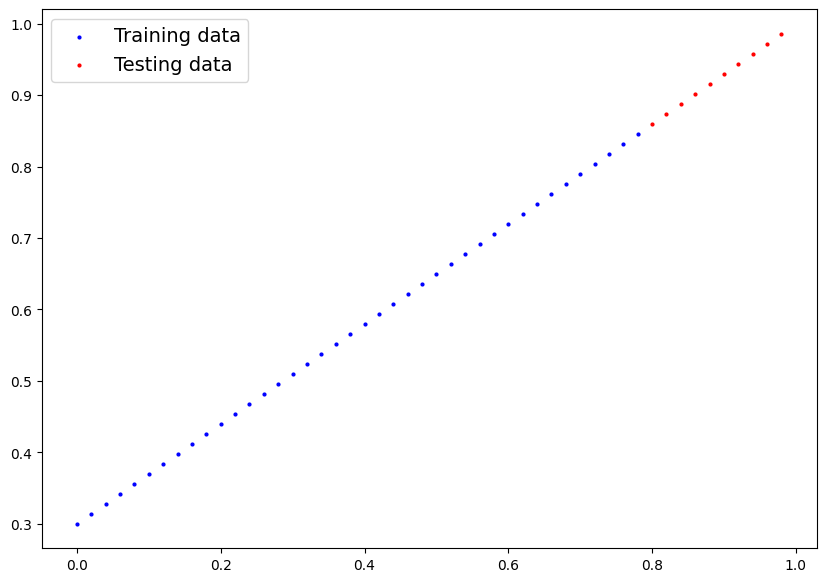

In [6]:
plot_predictions()

In [7]:
from torch import nn
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x +  self.bias

In [8]:
torch.manual_seed(42)
model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
with torch.inference_mode():
    y_preds = model_0(x_test)

In [10]:
print(f"No. of testing samples: {len(x_test)}")
print(f"No. of predictions made: {len(y_preds)}")
print(f"Predicted Values: {y_preds}")

No. of testing samples: 10
No. of predictions made: 10
Predicted Values: tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


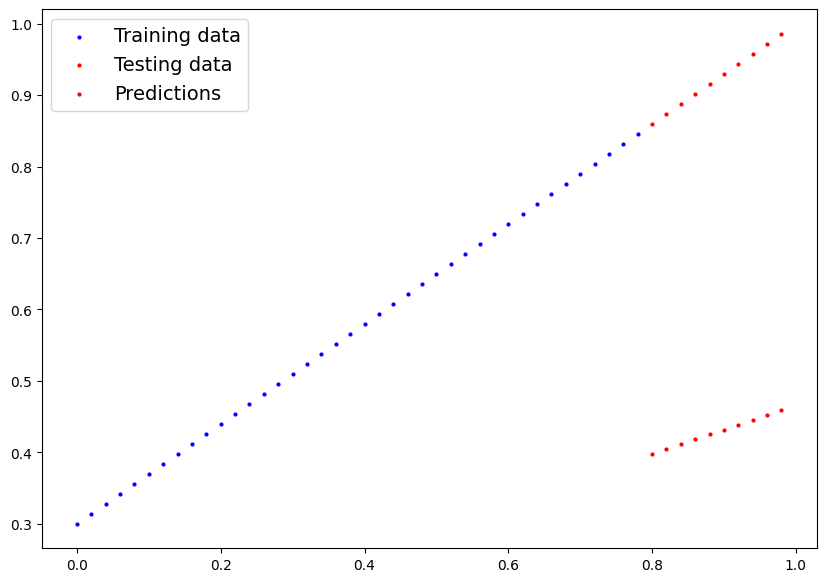

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)

In [13]:
torch.manual_seed(42)

epochs = 10000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(x_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        if epoch % 10 ==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train loss: {loss} | MAE Test loss: {test_loss}")

Epoch: 0 | MAE Train loss: 0.31288135051727295 | MAE Test loss: 0.47563618421554565
Epoch: 10 | MAE Train loss: 0.17388133704662323 | MAE Test loss: 0.28663620352745056
Epoch: 20 | MAE Train loss: 0.042198799550533295 | MAE Test loss: 0.0987466350197792
Epoch: 30 | MAE Train loss: 0.044207725673913956 | MAE Test loss: 0.005456477403640747
Epoch: 40 | MAE Train loss: 0.022640462964773178 | MAE Test loss: 0.0635034590959549
Epoch: 50 | MAE Train loss: 0.017085563391447067 | MAE Test loss: 0.0409594364464283
Epoch: 60 | MAE Train loss: 0.008707200177013874 | MAE Test loss: 0.013333290815353394
Epoch: 70 | MAE Train loss: 0.0023071214091032743 | MAE Test loss: 0.002345192478969693
Epoch: 80 | MAE Train loss: 0.0022460990585386753 | MAE Test loss: 0.002025943947955966
Epoch: 90 | MAE Train loss: 0.0018262952798977494 | MAE Test loss: 0.0037562549114227295
Epoch: 100 | MAE Train loss: 0.002000708132982254 | MAE Test loss: 0.0017548144096508622
Epoch: 110 | MAE Train loss: 0.00146101193968206

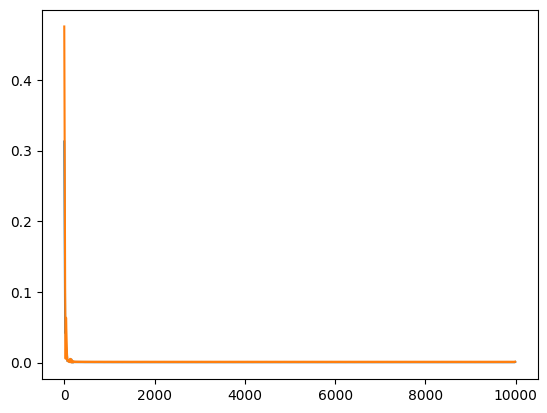

In [14]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")